<a href="https://colab.research.google.com/github/Nandanishukla/Rental_Bike_Prediction/blob/main/BikeRentalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Problem Statement**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.


# Loading Dataset and Importing Modules

In [ ]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


In [ ]:
# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


In [ ]:
# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData - SeoulBikeData.csv')


Understand More About The Data

Dataset First View

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes



Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns


Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


# Dataset Information

In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()},unique values with {len(bike_df[bike_df.duplicated()])} duplication")


Data is duplicated ? False    8760
Name: count, dtype: int64,unique values with 0 duplication



Check Unique Values for each variable

In [ ]:
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(蚓) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(蚓) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.



Missing Values / Null values

In [ ]:
bike_df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Visualizing the missing values

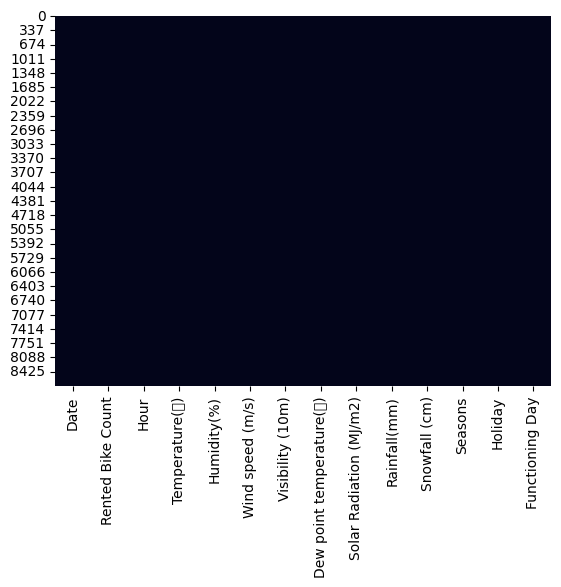

In [ ]:
sns.heatmap(bike_df.isnull(), cbar=False);

**What did you know about your dataset?**


*   There are 8760 observation and 14 features.
*   In a day we have 24 hours and we have 365 days a year so 365 multiplied by
    24 = 8760, which represents the number of line in the dataset
*   There are no null values.
*  Dataset has all unique values i.e., there is no duplicate, which means data
   is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
*   Date has some object data types, it should be datetime data type













# Understanding  Variables

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')


Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe()

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Features description**
**Breakdown of Our Features:**

**Date **: The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count  **: Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)** : Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

# **Preprocessing the dataset**
**Why do we need to handle missing values?**


*   The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first




In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

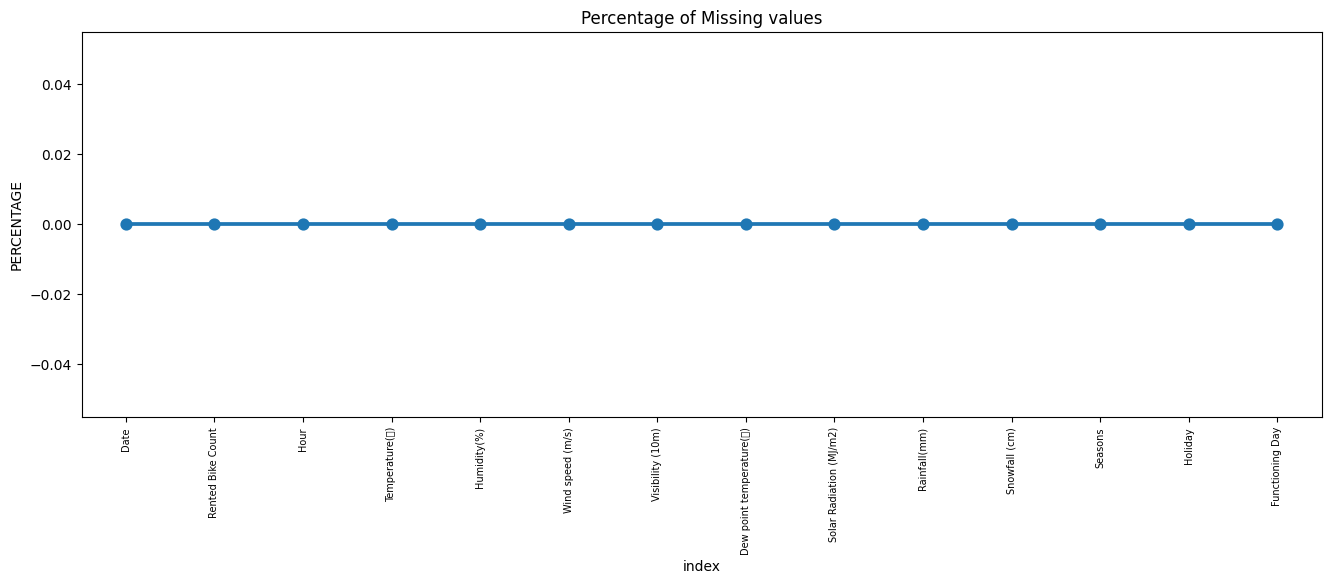

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

As we can see above there are no missing value presents

**Changing column nam**e

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(蚓)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(蚓)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.


# Breaking date column

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [ ]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)



*  So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number *
 contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.







In [ ]:

bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

**Changing data type**
* As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:

#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

### **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Exploratory Data Analysis Of The Data Set


Why do we perform EDA?

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.


**Univariate Analysis**

Why do you do univariate analysis?

The key objective of Univariate analysis is to simply describe the data to find patterns within the data.



**Analysation of categorical variables**

Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

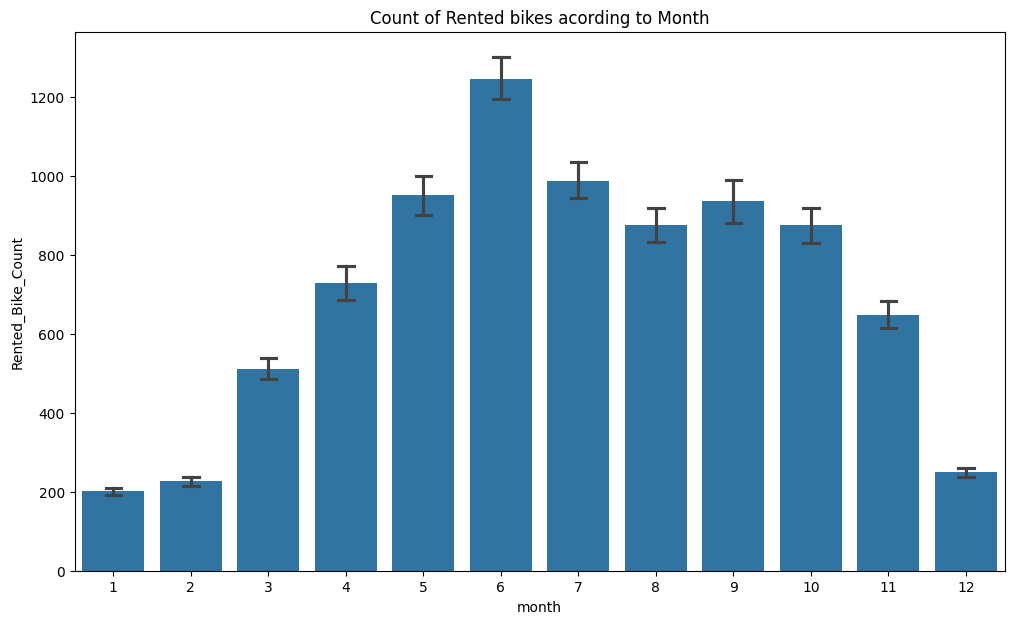

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.


**weekdays_weekend**


[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

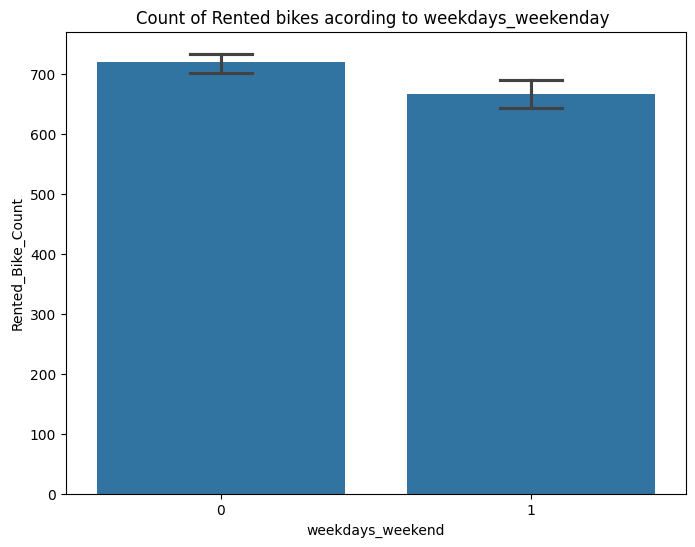

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')


[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

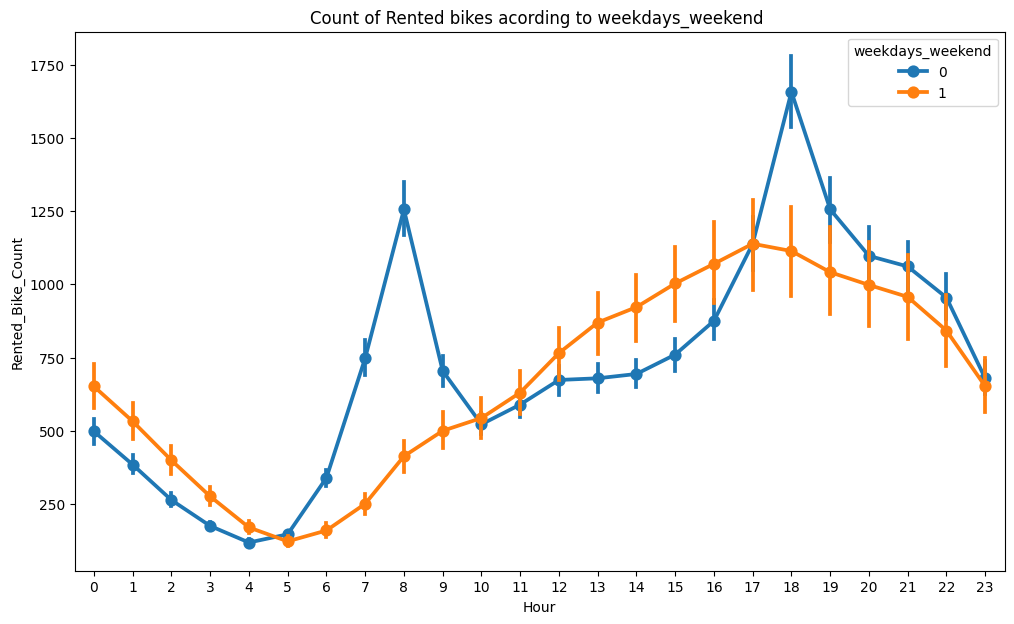

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

**Hour**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

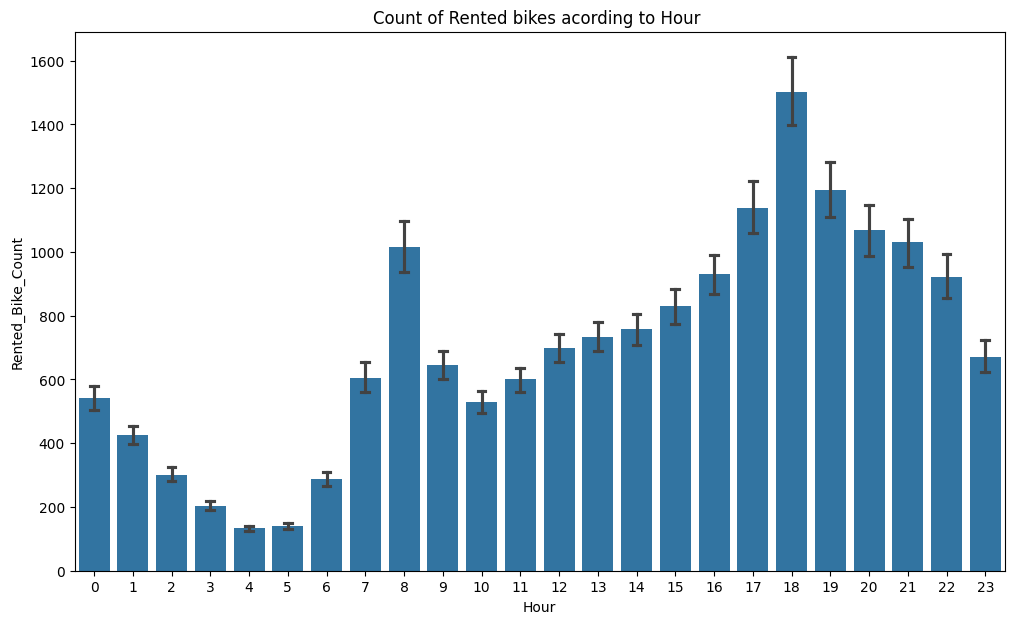

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')


* In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.
* generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.


**Functioning Day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

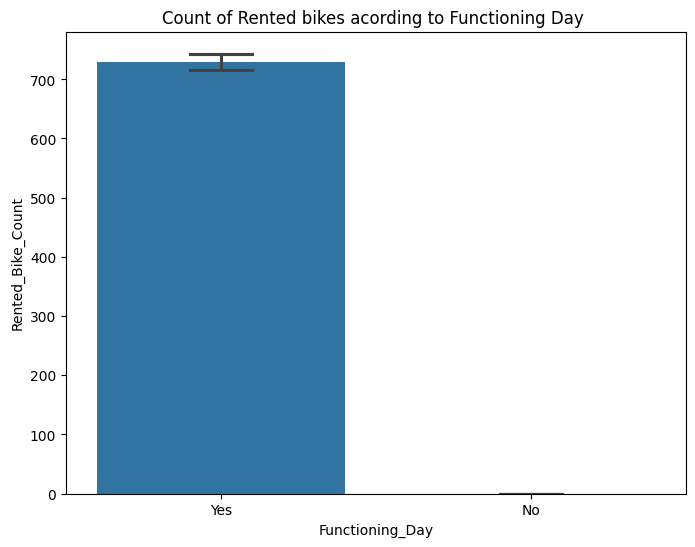

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

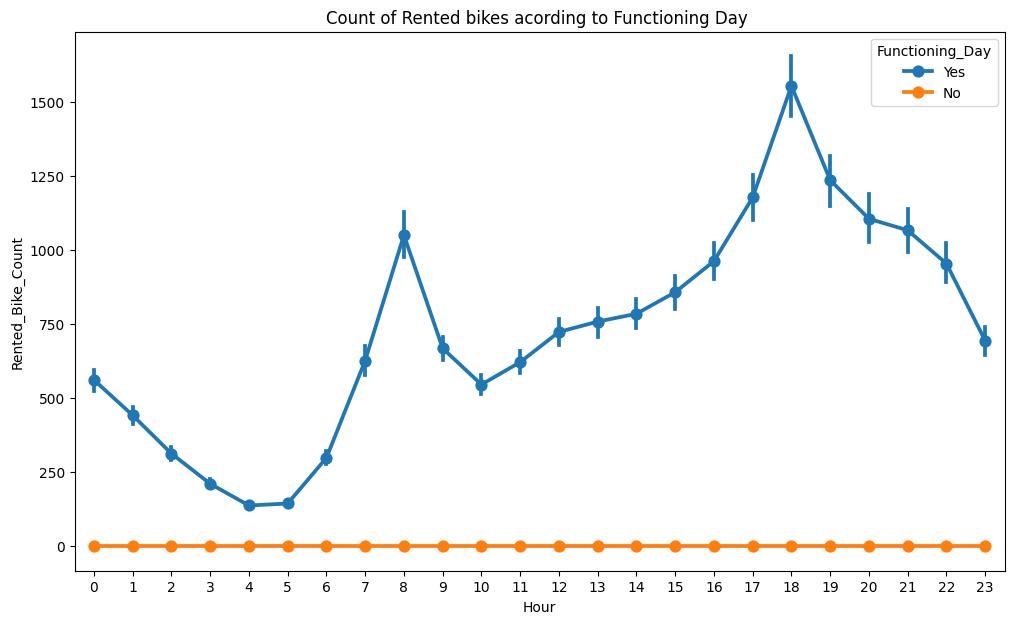

In [ ]:
 #anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')


* In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,
* Peoples don't use reneted bikes in no functioning day.


**Seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

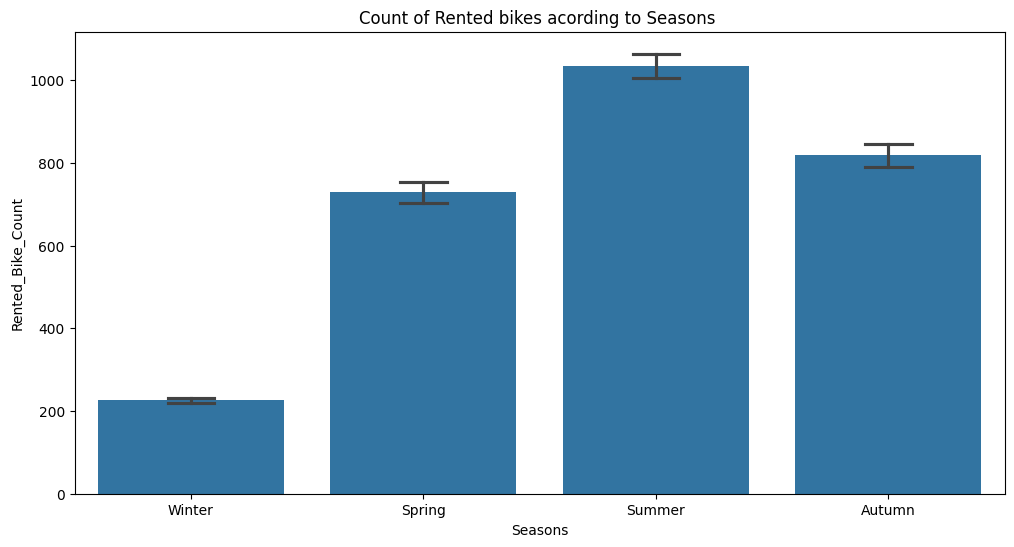

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

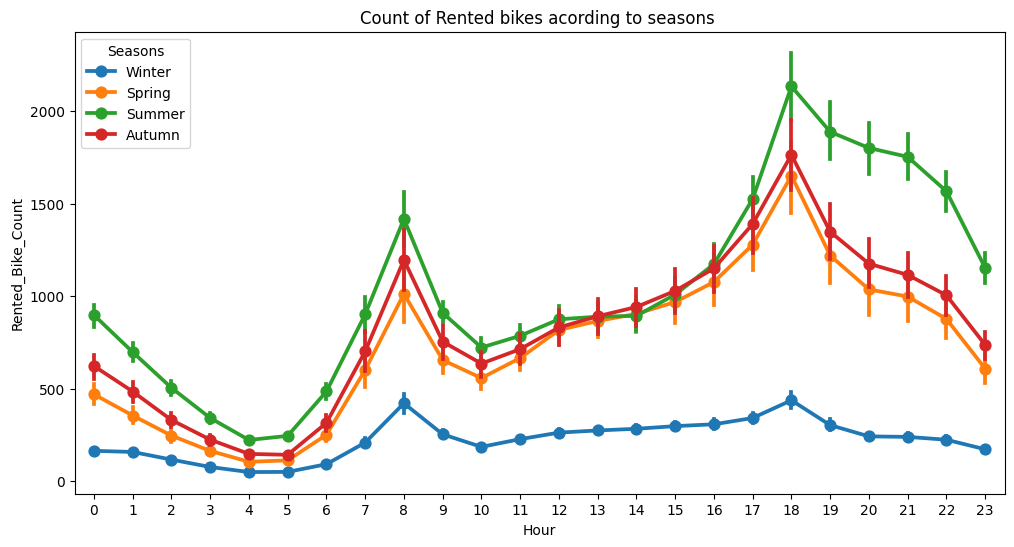

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')


* In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,
* In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.
* In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.


**Holiday**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

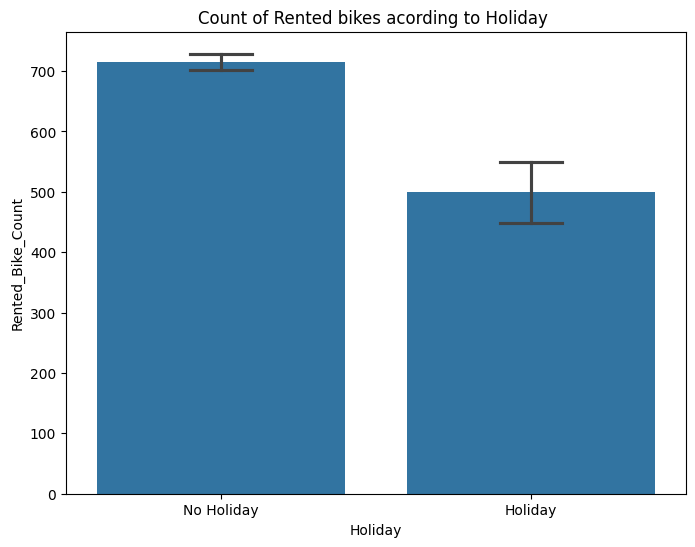

In [ ]:

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

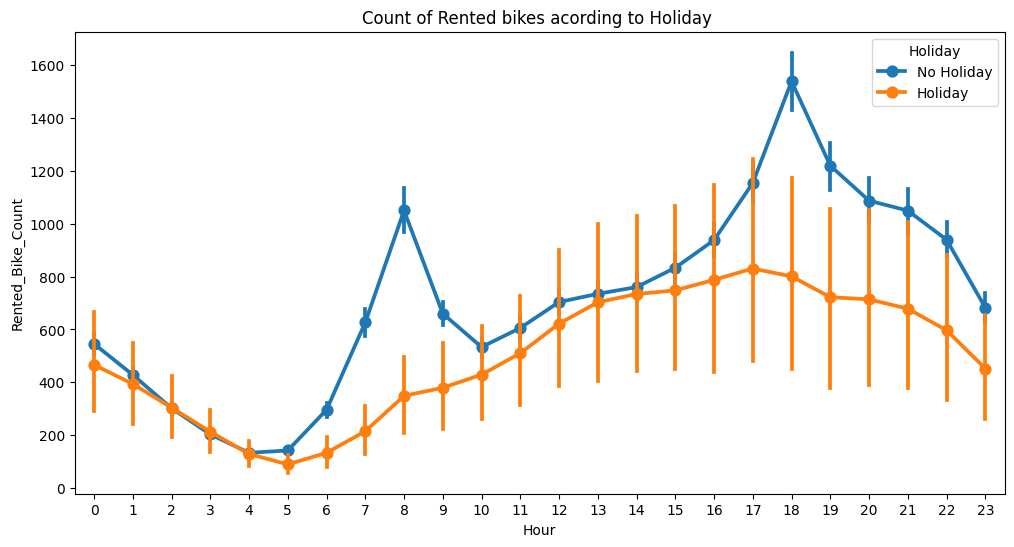

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* In the above bar plot and point plot which shows the use of rented bike in a  holiday, and it clearly shows that,
* In holiday, people uses the rented bike from 2pm-8pm

**Analyze of Numerical variables**

**Pays little attention to the skewness of our numerical features**

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


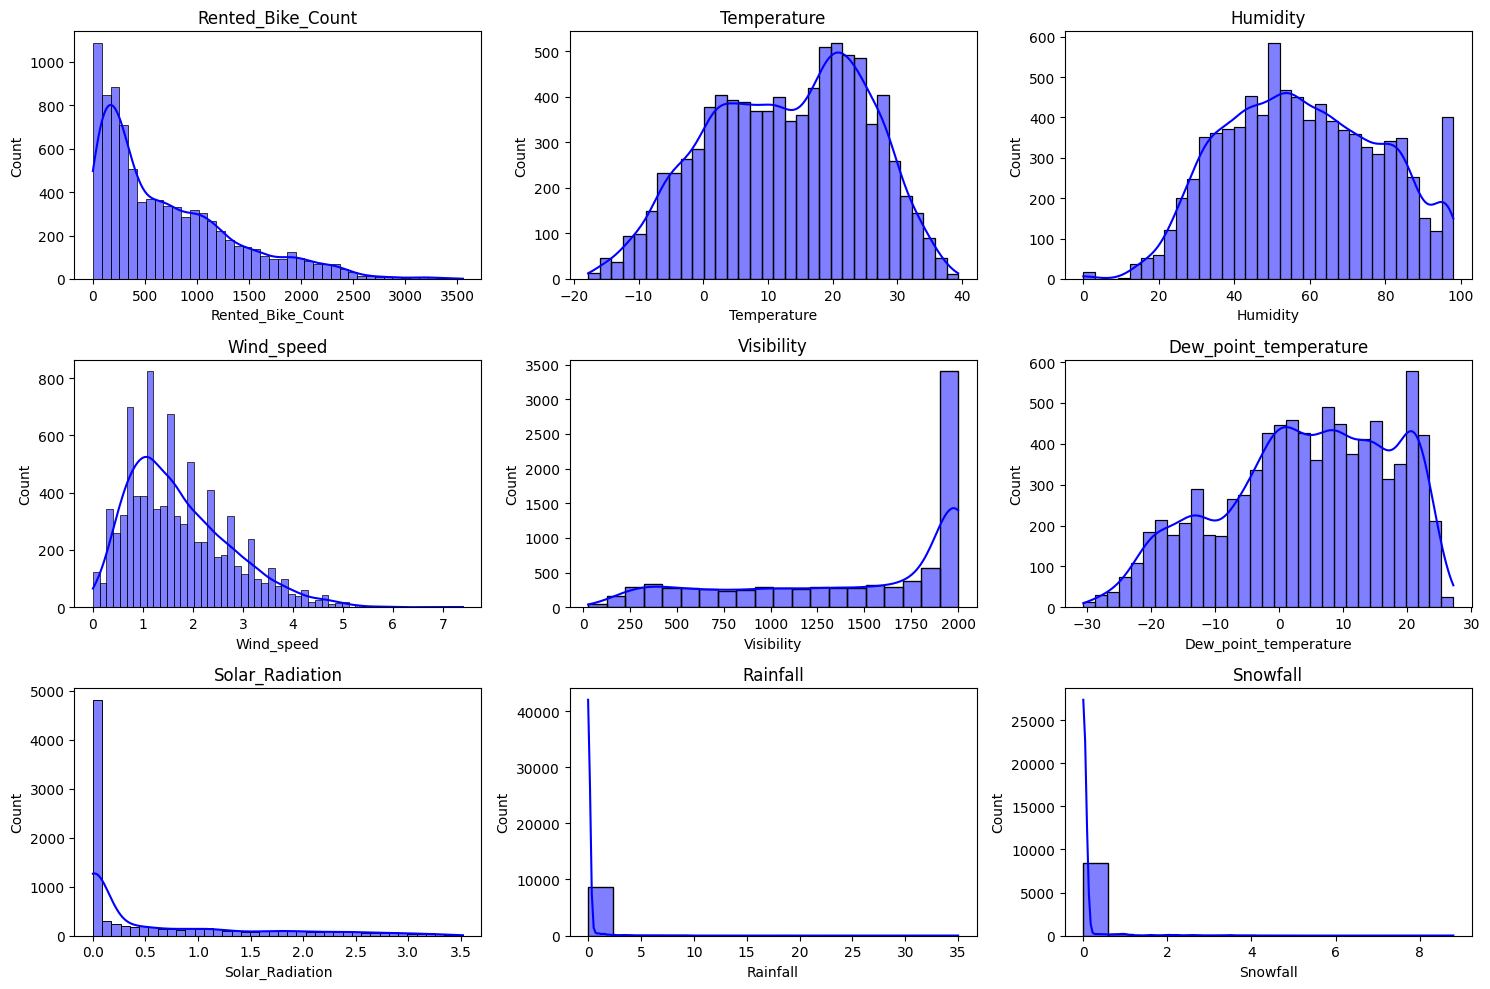

In [ ]:
# printing displots to analyze the distribution of all numerical features
import matplotlib.pyplot as plt
import seaborn as sns

n = 1
plt.figure(figsize=(15, 10))
for i in numeric_features.columns:
    plt.subplot(3, 3, n)
    n += 1
    sns.histplot(bike_df[i], kde=True, color='blue', edgecolor='black')  # Overlay kernel density estimate
    plt.title(i)
    plt.tight_layout()
plt.show()





**Right skewed columns are**

Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

**Left skewed columns are**

Visibility (10m), Dew point temperature(°C)


# **REGRESSION PLOT**
The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

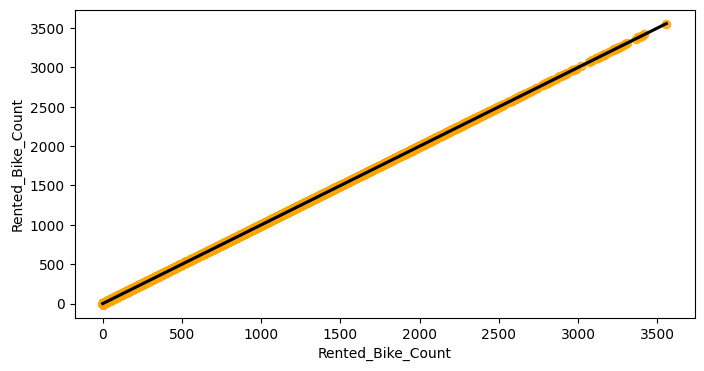

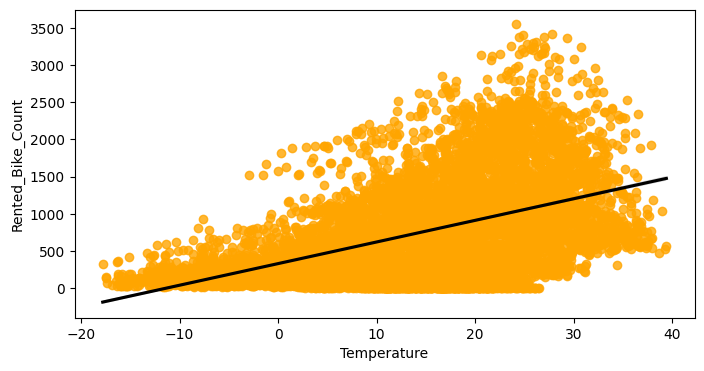

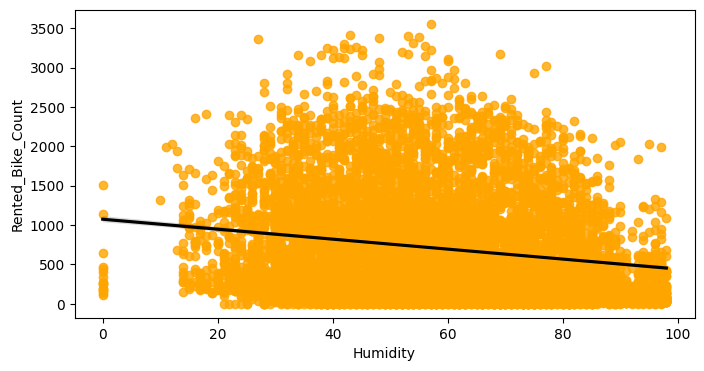

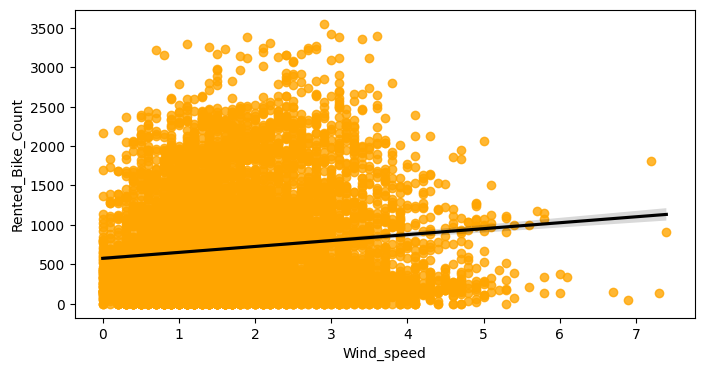

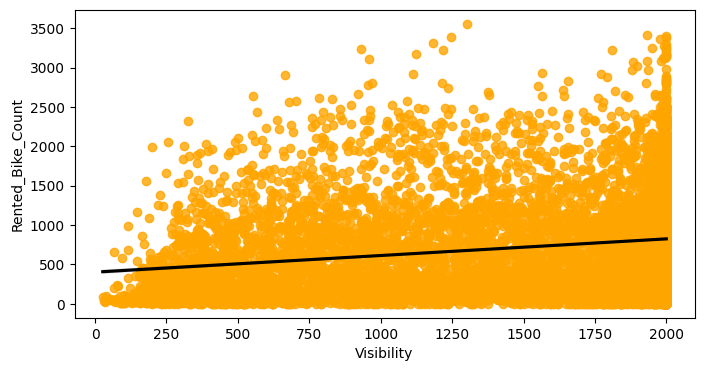

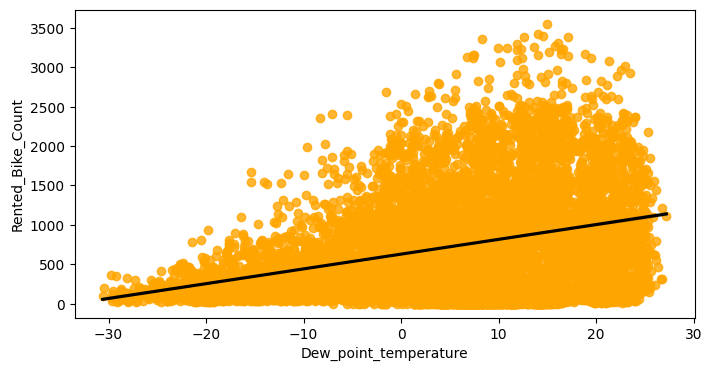

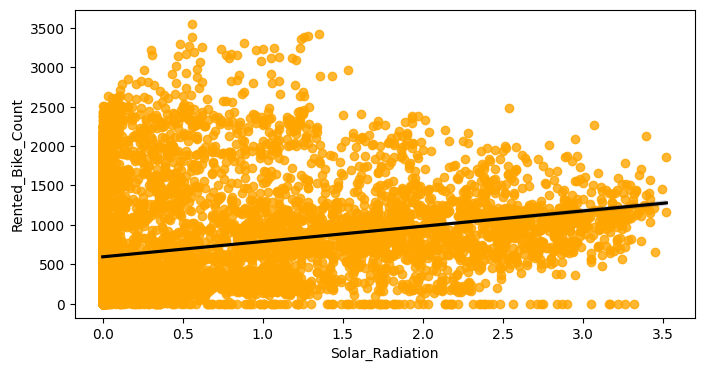

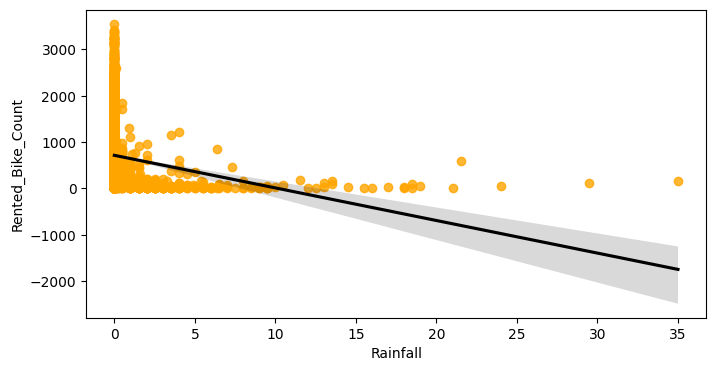

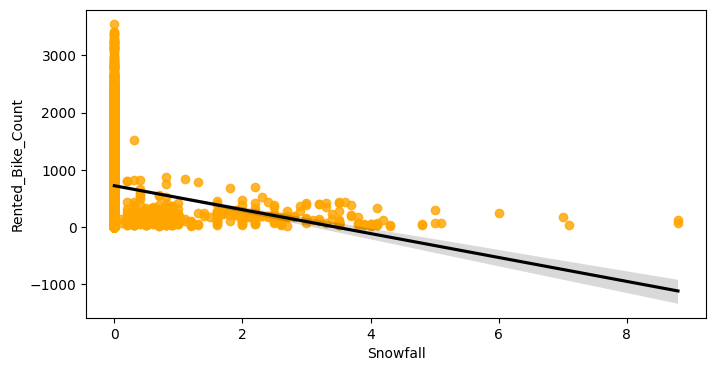

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})



* From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

* which means the rented bike count increases with increase of these features.

* 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase

# **Normalise Rented_Bike_Count column data**
* The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data

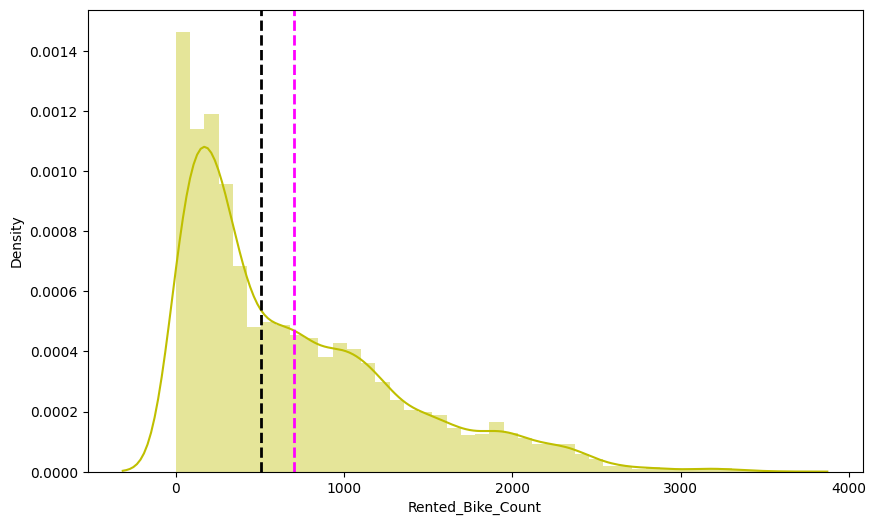

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.


**Finding Outliers and treatment**

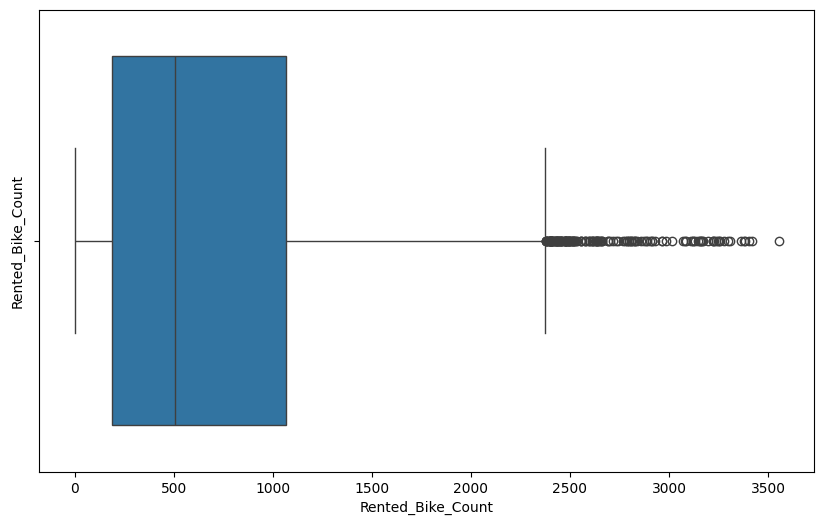

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()


In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4

we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

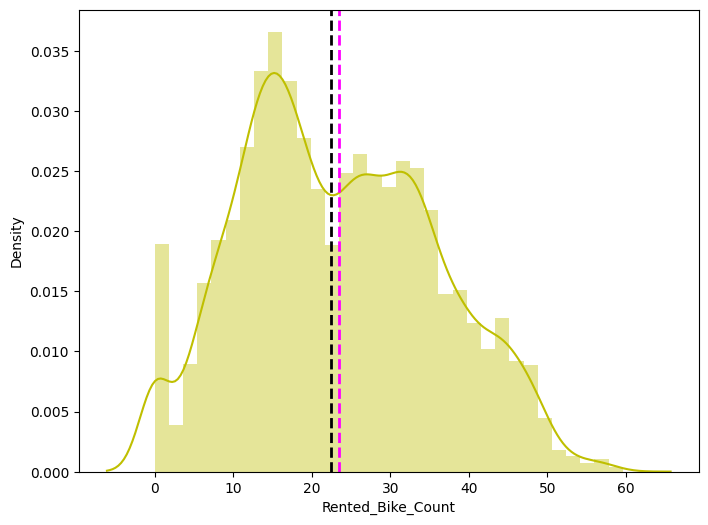

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

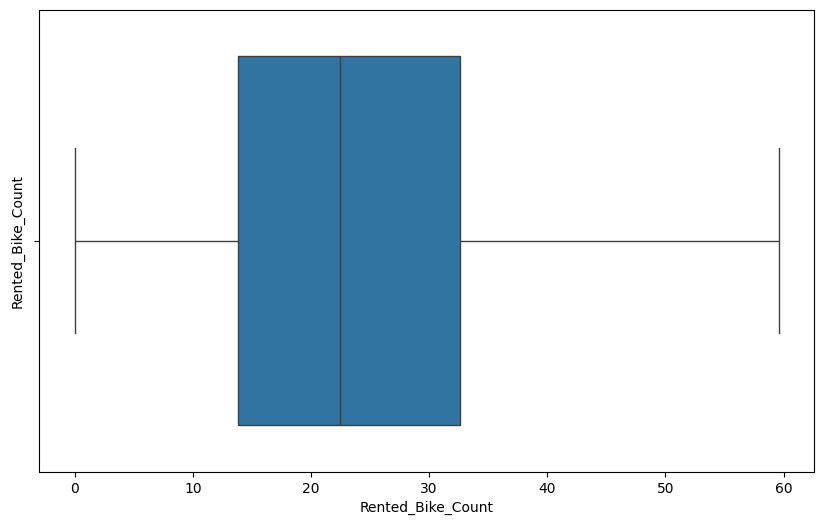

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Checking of Correlation between variables**


**Checking in OLS Model**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:16:04   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

* For F statistic , P value is less than 0.05 for 5% levelof significance.

* P value of dew point temp and visibility are very high and they are not significant.

* Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

* The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

* Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


* From the OLS model we find that the 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them.
* For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop *
* Dew_point_temperature column
For clarity, we use visualisation i.e heatmap in next step

**Heatmap**
A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.

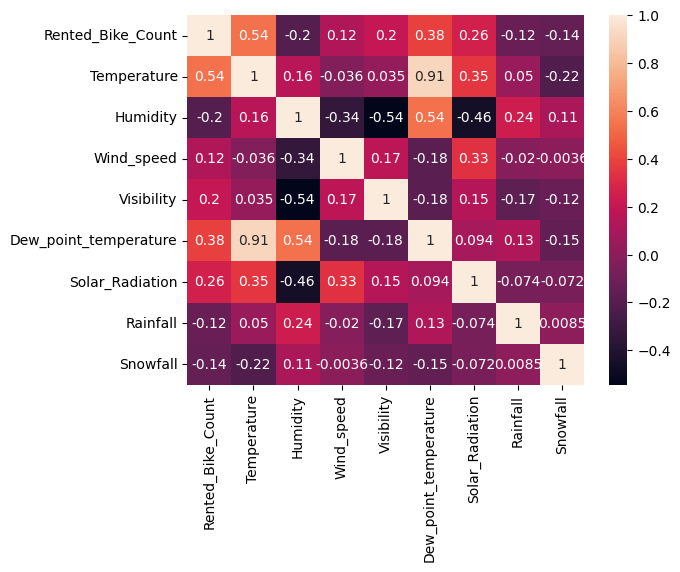

In [ ]:
#checking correlation using heatmap

sns.heatmap(numeric_features.corr(),annot=True)
plt.show()


**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are:**

* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are:**\

* humidity
* rainfall


From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.

In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


**Analysing Categorical Variable**

# **Feature Engineering & Data Pre-processing**

**Create the dummy variables**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.


**One Hot Encoding**

In [ ]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features



Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False



# **Model Training**
**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y.head()


0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   bool   
 9   Hour_2               8760 non-null   bool   
 10  Hour_3               8760 non-null   bool   
 11  Hour_4               8760 non-null   bool   
 12  Hour_5               8760 non-null   bool   
 13  Hour_6               8760 non-null   bool   
 14  Hour_7               8760 non-null   bool   
 15  Hour_8               8760 non-null   b

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2 Where:

* n = number of items,

* Σ = summation notation,

* Actual = original or observed y-value,

* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
* Formula for R-Squared:

  R^2= 1-Unexplained Variation/ Total Variation

* R 2 =1− Total Variation Unexplained Variation​
* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​



# **LINEAR REGRESSION**
Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.791252853377143

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

MSE : 32.145114805768415


In [ ]:
#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

RMSE : 5.669666198795871


In [ ]:
#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

MAE : 4.30109837175655


In [ ]:
#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



R2 : 0.8023787935913236
Adjusted R2 : 0.7866725004867255



Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)}
training_df=pd.DataFrame(dict1,index=[1])


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 31.21751120108675
RMSE : 5.587263301571419
MAE : 4.260531657874549
R2 : 0.8023787935913236
Adjusted R2 : 0.7980425673069129



The test set's r2_score is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

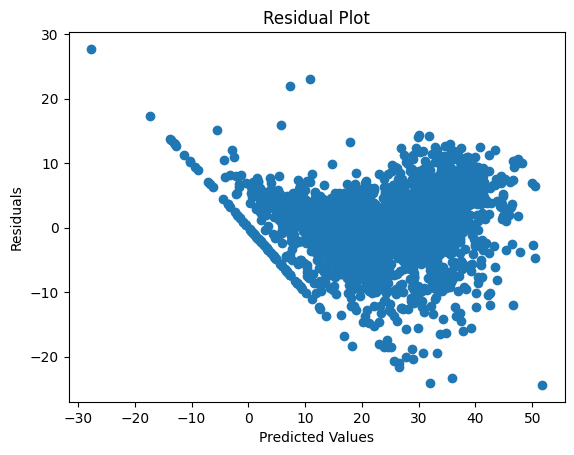

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

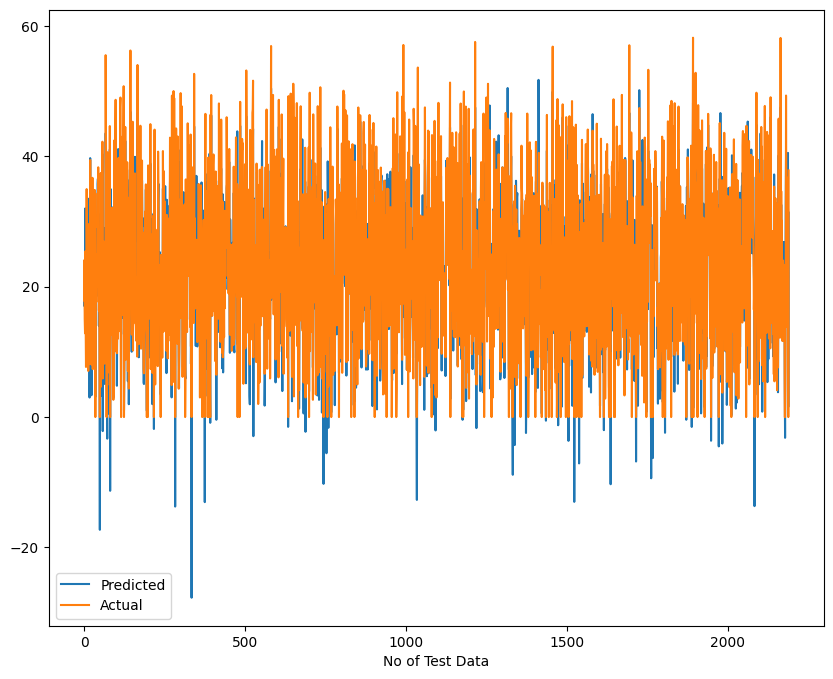

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


**Ridge and Lasso Regression**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function

**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38086483341841226 0.3983632039954085


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.6464586070881
RMSE : 9.625303039753508
MAE : 7.304643598875601
R2 : 0.3983632039954085
Adjusted R2 : 0.38516202313069525


Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }



In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.80255544932679
RMSE : 9.8895174528046
MAE : 7.505550890266117
R2 : 0.38086483341841226
Adjusted R2 : 0.3672797013785736


The test set's r2_score is 0.38. This means our linear model is not performing well on the data.

In [ ]:
import pandas as pd

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }




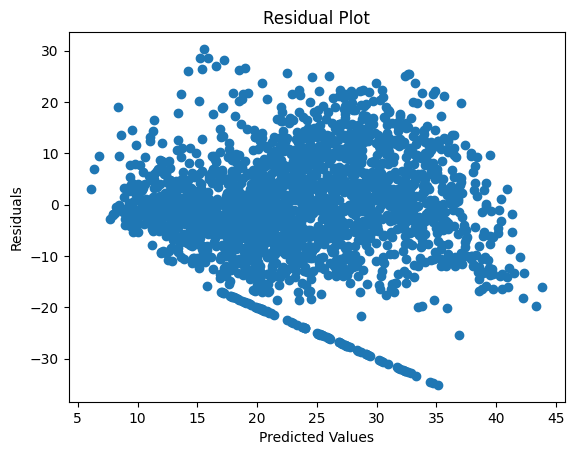

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

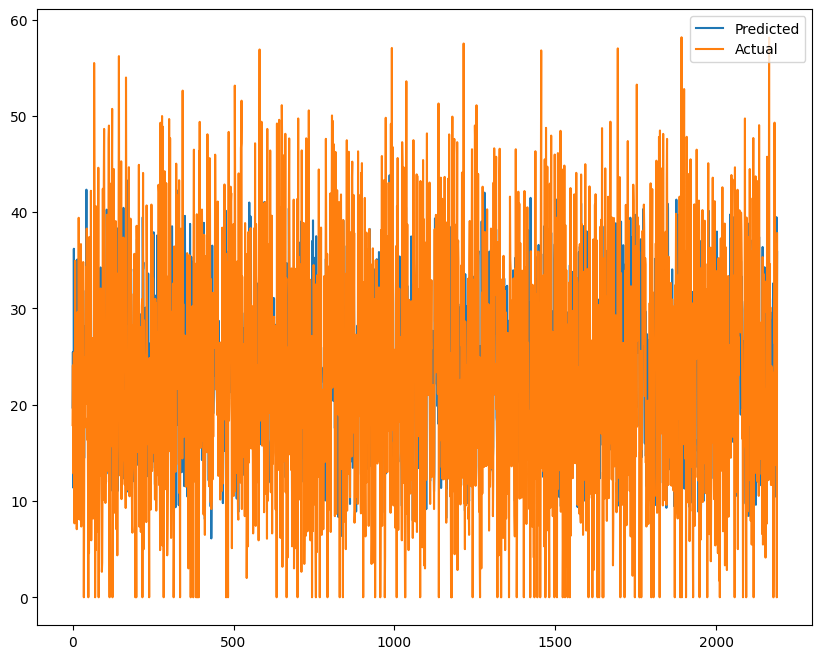

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


**RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)


0.7912527761772726

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

array([20.62298584, 30.79728204, 19.9313908 , ..., 34.40392233,
       23.28141619, 22.22957588])

In [ ]:
y_pred_test_ridge

array([17.10269158, 23.09797634, 20.39407758, ..., 40.50590122,
        1.57892994, 31.35388445])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145126693828864
RMSE : 5.6696672471873395
MAE : 4.301221643579305
R2 : 0.7912527761772726
Adjusted R2 : 0.786672421592927


**Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)
#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 31.218732967563575
RMSE : 5.587372635466832
MAE : 4.260759424869219
R2 : 0.8023710592474951
Adjusted R2 : 0.79803466325526


The r2_score for the test set is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}


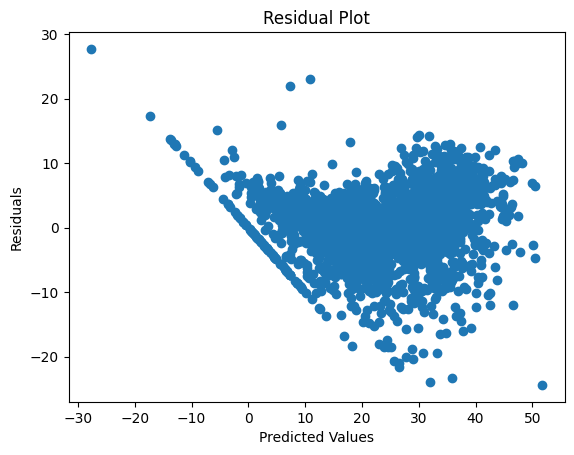

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

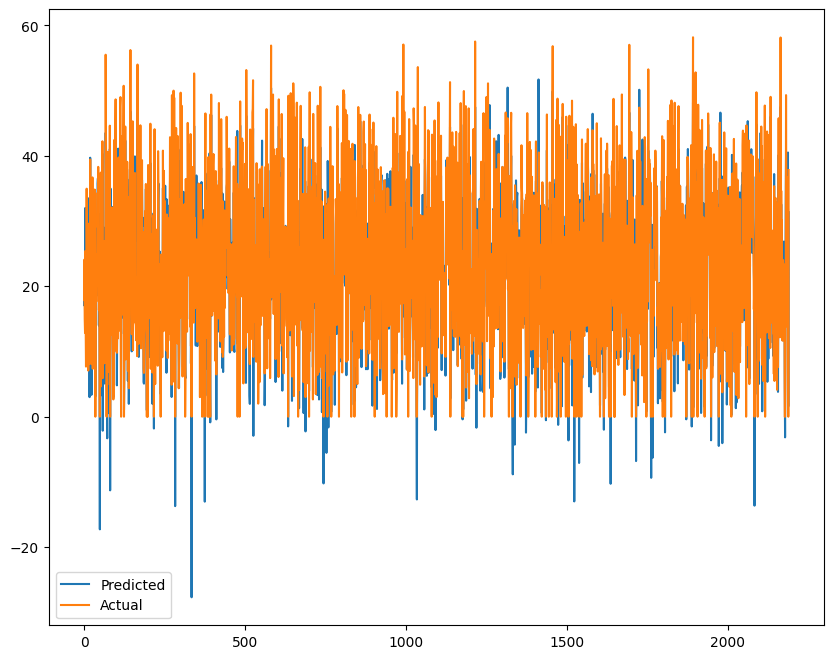

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


**DECISION TREE**

A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
print(y_pred_train_d)
print(y_pred_test_d)

[27.31030817 34.88092423 10.27695349 ... 34.88092423 22.16873913
 22.16873913]
[14.77881662 22.71906858 22.54473659 ... 34.88092423  0.
 34.88092423]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))
#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6827044344568911
MSE : 48.860559517835576
RMSE : 6.990032869581914
MAE : 5.080488337137506
R2 : 0.6827044344568911
Adjusted R2 : 0.6757423001989424



Looks like our train set's r2 score value is 0.70, that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 52.03332249078211
RMSE : 7.213412679916637
MAE : 5.212881049876304
R2 : 0.6706051325538692
Adjusted R2 : 0.6633775140804947



The r2_score for the test set is 0.68. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }

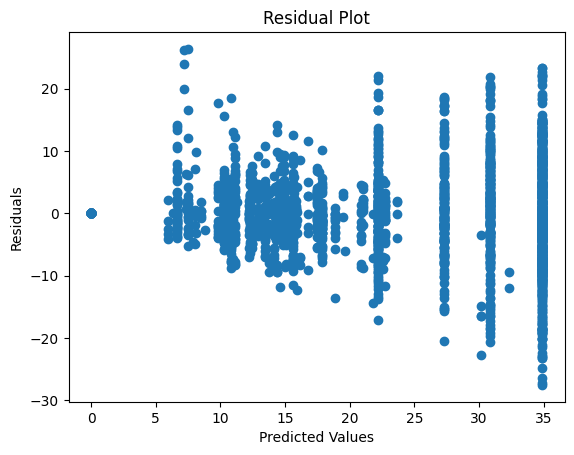

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

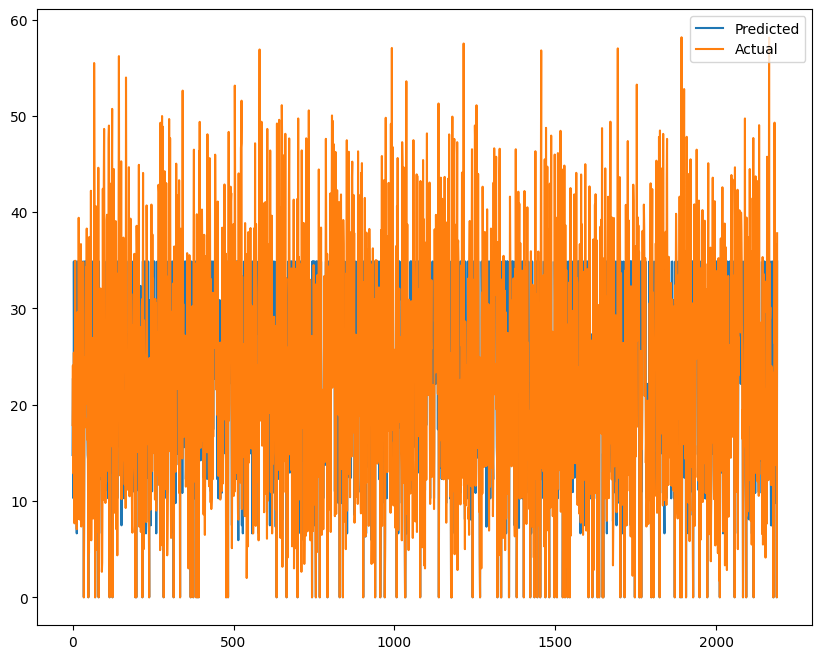

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


**RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9895351872644255
MSE : 1.6114836166535549
RMSE : 1.2694422462851767
MAE : 0.8069313215091871
R2 : 0.9895351872644255
Adjusted R2 : 0.9893055671903956



Looks like our train set's r2 score value is 0.98 that means our model is able to capture most of the data variance.Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

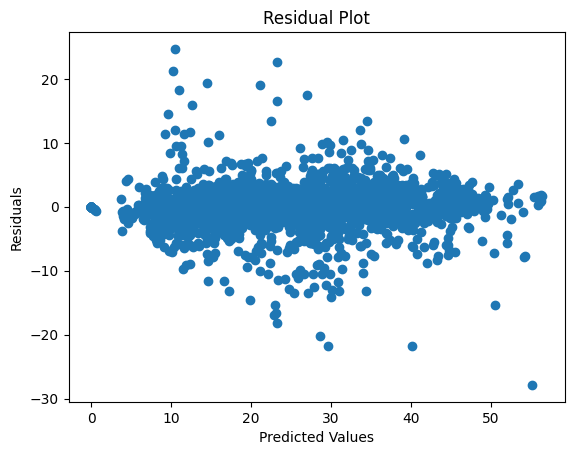

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.11718967e-01, 1.59060468e-01, 1.17805250e-02, 1.21617182e-02,
       3.25309019e-02, 3.21029975e-02, 1.35781419e-03, 4.35127450e-03,
       1.22393850e-02, 1.95075296e-02, 2.78868770e-02, 2.43284044e-02,
       7.53830653e-03, 4.13618062e-03, 1.36234747e-02, 9.76892050e-04,
       2.32595930e-03, 1.16020682e-03, 2.96654113e-04, 2.74309702e-04,
       3.83322113e-04, 1.55564918e-03, 3.69569730e-03, 1.08128619e-02,
       3.06130794e-02, 1.83122783e-02, 1.33289965e-02, 1.35186022e-02,
       1.07104501e-02, 4.48979794e-03, 4.20938874e-03, 1.01723489e-03,
       8.80691713e-03, 4.17222356e-03, 1.53816946e-01, 3.33594204e-04,
       4.03252946e-03, 1.17787632e-03, 1.36270737e-03, 2.43553968e-03,
       6.94897953e-04, 2.52569403e-03, 8.25872193e-04, 2.82339949e-03,
       4.89821705e-03, 7.67967859e-04, 1.93194131e-02])

**FEATURES STORED**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)


,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
25,Hour_19,0.02
11,Hour_5,0.02
46,weekdays_weekend_1,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

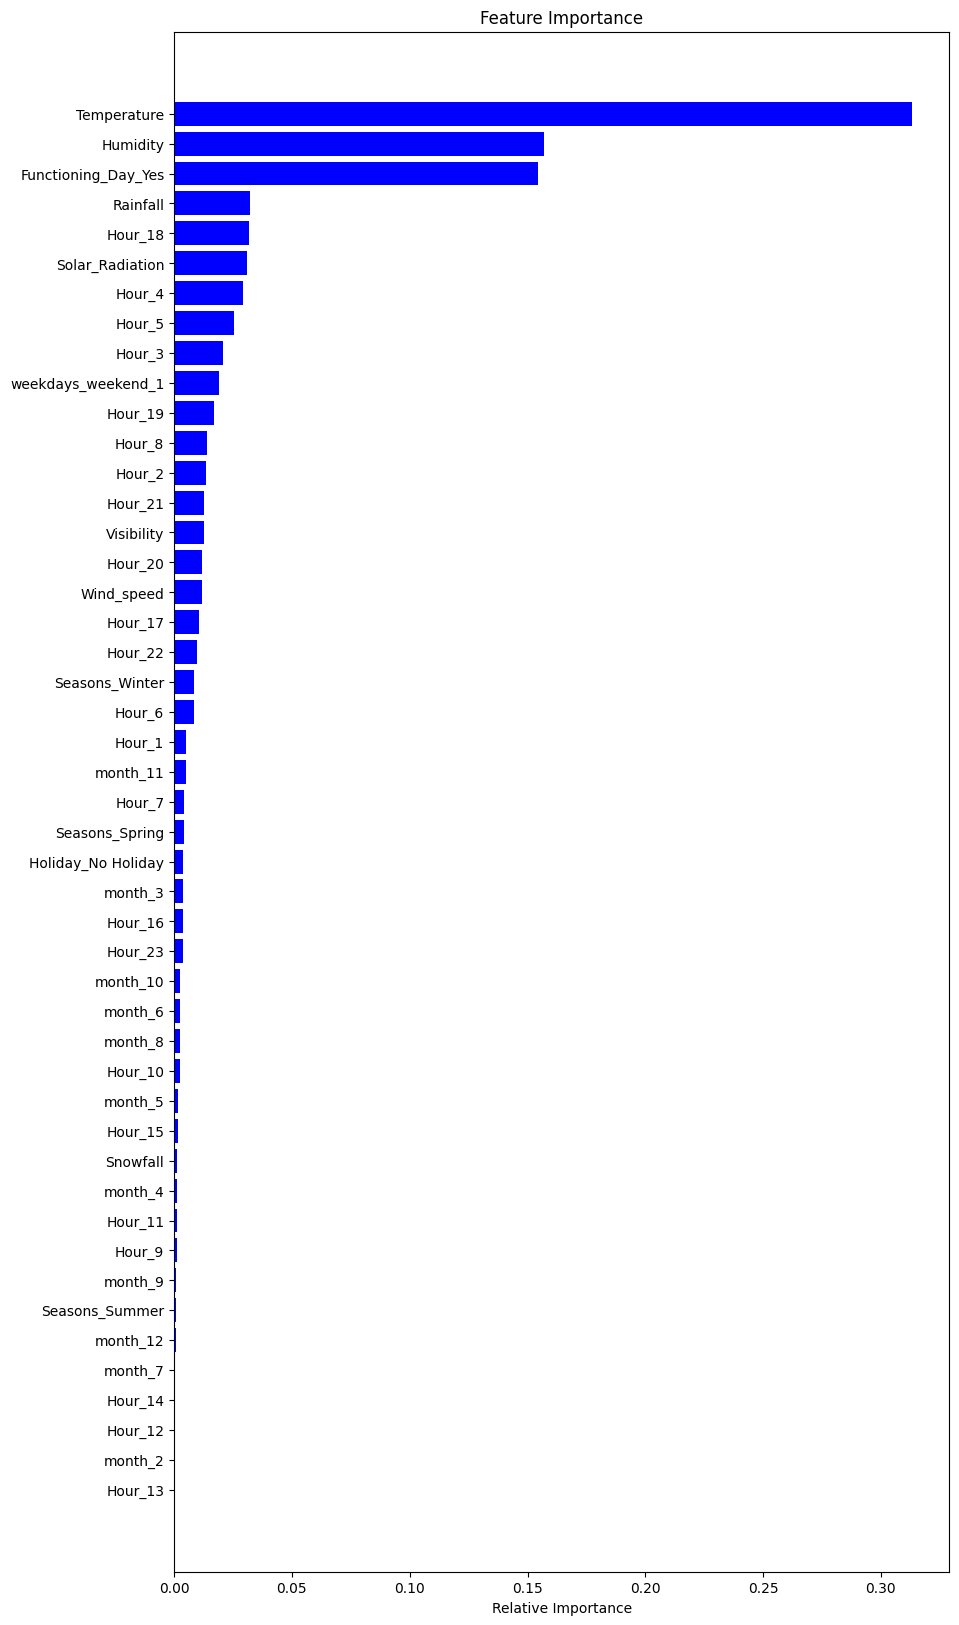

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

**Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 6 machine learning algorithms including Linear Regression,Lasso , Ridge, Decision Tree, Random Forest.